Abstract:
Searches for new physics at the LHC often involve looking for excesses on top of falling backgrounds. Typical approaches model the background using polynomials or other parametric families. Polynomials are nice because they theoretically provide unbiased estimates of the background, however they can lead to undesirable behavior in the tails. Parametric families can be found which provide accurate estimates but are often ad-hoc and can lead to biased estimates. To address these biases one typically considers several parametric families at once to estimate the systematic uncertainty. In this work we motivate the use of the hyperexponential model for estimating falling backgrounds. The hyperexponential model is unique in representation and can approximate any completely monotonic function to arbitrary precision. We show that the hyperexponential model gives comparable performance to other methods in data and in toy studies that it is flexible enough to approximate many commonly used parametric families.

# Introduction

Searches for new physics often employ a statistical framework which consists of a signal and a background model. In most cases the standard model backgrounds are complicated enough that there is no analytic form for the background. In some cases the best thing to do is to use a non-parametric approach, deriving the background from Monte Carlo simulations of the standard model processes and detector response. In such cases it's not always clear that one is including all the relevant processes and validation of the method comes from cross-checks performed in data. In other cases people choose to use a parametric approach, modeling the background with some analytic function. The advantage of this approach is that it is often easier to implement as we do not need to worry about the details of the simulation, this is especially true when the background is not well understood. The disadvantage is that we need to choose a functional form and this choice can lead to biases which can be difficult to quantify. In this work we will focus on the case of a falling background, which is the most common case in high mass searches. We will show that the hyperexponential model is a good choice for modeling falling backgrounds and that it has several advantages over other methods.

One commonly used analytic form for the background is a polynomial. Polynomials are nice because of their theoretical properties which guarantee that they are unbiased estimates of the background. However, polynomials can lead to undesirable behavior in the tails where they can diverge to infinity after running out of data. Any deviation from a falling background could be evidence of new physics so it would be nice to have a model which incorporates some physics intuition. Other approaches involve using some parametric family of functions which are not necessarily unbiased but lack the undesirable flexibility of polynomials. The functions used are often ad-hoc and are derived from backgrounds specific to a given analysis. The bias is usually quantified by considering several parametric families at once, in a method known as discrete profiling or the envelope method.

# Exponential Mixture Model

The hyperexponential model is given by
$$
f(x) = \sum_{i=1}^k w_i e^{-r_i x}
$$
where $\sum_{i=1}^k w_i = 1, w_i \geq 0$ and $r_i > 0$.


The hyperexponential model is a nice compromise between these two approaches. Like a polynomial it can vary in complexity as needed, but is guaranteed to be monotonic. If the background is completely monotonic i.e.
$$
\frac{d^n}{dx^n} f(x) \geq 0
$$
for all $n$ and $x$, then the hyperexponential model can approximate $f(x)$ to arbitrary precision [??]. 

 Choosing $k$ is not trivial, the model is not flexible enough to fit most signals so there is little risk in overfitting - the choice of $k$ then is a trade off between predictive power, computational cost and uncertainty quantification.

In [1]:
# Imports
from analysis import bkg_study as bkg
import ROOT
import numpy as np
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.30/04


In [2]:
# Get data
t_mgg = bkg.get_mgg()
bins = bkg.get_fine_binning()

Loaded 5036 diphoton invariant masses from data.


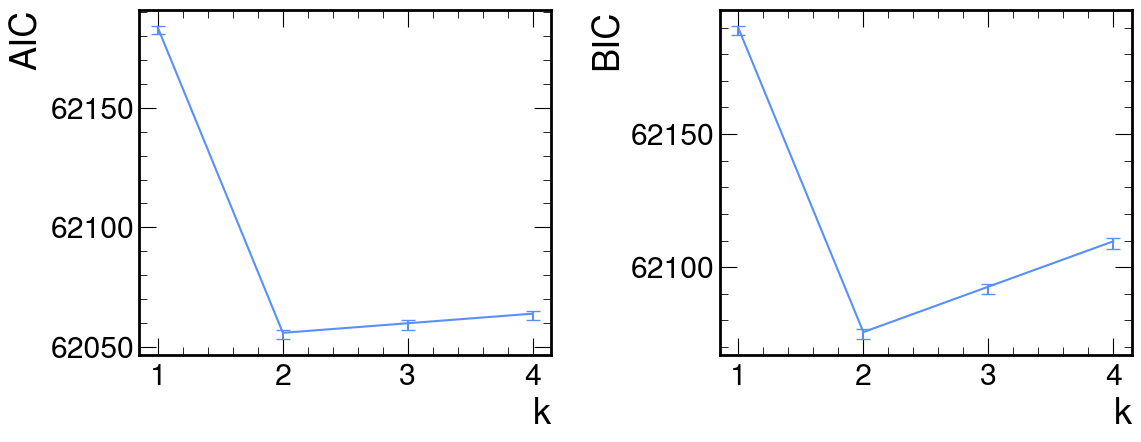

In [3]:
# Plot the AIC/BIC
aic_bic_df = bkg.get_AIC_BIC_loo(t=t_mgg)
bkg.plot_AIC_BIC_loo(df=aic_bic_df,)

In [18]:
import random

# Fit in random subsets and plot the rate parameters
def fit_random_subset(tree):

    bounds = (500, 4000)

    lower = random.uniform(bounds[0], bounds[1])
    upper = random.uniform(lower, bounds[1])

    x = ROOT.RooRealVar("x", "x", lower, upper)
    data = ROOT.RooDataSet("data", "data", tree, ROOT.RooArgSet(x))

    rate = ROOT.RooRealVar("rate", "rate", -1e-3, -1e-1, -1e-9)
    pdf = ROOT.RooExponential("pdf", "pdf", x, rate)
    
    result = pdf.fitTo(data, ROOT.RooFit.Save(True), ROOT.RooFit.PrintLevel(-1))

    # Check if the fit converged
    fit_status = result.status()  # 0 means OK
    cov_quality = result.covQual()  # 3 is the best

    if fit_status != 0 or cov_quality < 2:
        # print(f"Fit did not converge properly: status={fit_status}, covQual={cov_quality}")
        return None  # or np.nan or some error value

    rate_val = rate.getVal()
    return rate_val

# Fit many random subsets
import multiprocessing as mp

n_subsets = 9000
with mp.Pool(12) as pool:
    rates = pool.map(fit_random_subset, [t_mgg] * n_subsets)

rates = [rate for rate in rates if rate is not None]  # Filter out failed fits

[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data) Skipping event #0 because x cannot accommodate the value 560.237
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data) Skipping event #1 because x cannot accommodate the value 1314.98
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data) Skipping event #2 because x cannot accommodate the value 689.955
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data) Skipping event #3 because x cannot accommodate the value 551.36
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data) Skipping ...
[#0] WARNING:DataHandling -- RooTreeDataStore::loadValues(data) Ignored 4734 out-of-range events
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data) Skipping event #0 because x cannot accommodate the value 560.237
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data) Skipping event #1 because x cannot accommodate the value 1314.98
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data) Skipping even

Warning in <ROOT::Math::Fitter::CalculateHessErrors>: Error when calculating Hessian
Warning in <ROOT::Math::Fitter::CalculateHessErrors>: Error when calculating Hessian
Warning in <ROOT::Math::Fitter::CalculateHessErrors>: Error when calculating Hessian
Warning in <ROOT::Math::Fitter::CalculateHessErrors>: Error when calculating Hessian
Warning in <ROOT::Math::Fitter::CalculateHessErrors>: Error when calculating Hessian
Warning in <ROOT::Math::Fitter::CalculateHessErrors>: Error when calculating Hessian
Warning in <ROOT::Math::Fitter::CalculateHessErrors>: Error when calculating Hessian
Warning in <ROOT::Math::Fitter::CalculateHessErrors>: Error when calculating Hessian
Warning in <ROOT::Math::Fitter::CalculateHessErrors>: Error when calculating Hessian
Warning in <ROOT::Math::Fitter::CalculateHessErrors>: Error when calculating Hessian
Warning in <ROOT::Math::Fitter::CalculateHessErrors>: Error when calculating Hessian
Warning in <ROOT::Math::Fitter::CalculateHessErrors>: Error when 

Text(1, 0, 'Rate Parameter')

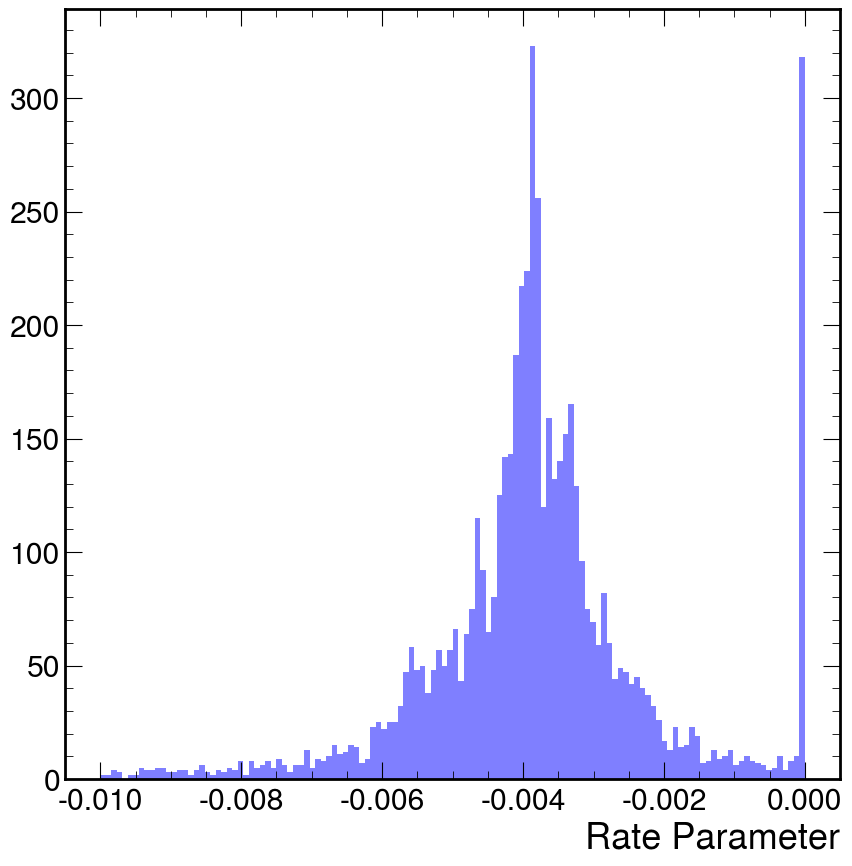

In [19]:
# Plot the rate parameters
fig, ax = plt.subplots()
ax.hist(
    rates,
    bins=128,
    range=(-0.01, 0),
    alpha=0.5,
    color='blue',
    label='Random Subsets'
    )
ax.set_xlabel('Rate Parameter')
# ax.set_xscale('log')

[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
[#1] INFO:Minimization --  The following expressions will be evaluated in cache-and-track mode: (exp_0,exp_1)
Minuit2Minimizer: Minimize with max-calls 1500 convergence for edm < 1 strategy 1
Minuit2Minimizer : Valid minimum - status = 0
FVAL  = 31030.8261015359203
Edm   = 8.66934591508406374e-06
Nfcn  = 274
raw_rate_0	  = -0.00363189	 +/-  0.000273596	(limited)
raw_rate_1	  = -0.00505128	 +/-  0.000467665	(limited)
weight_0	  = 0.384616	 +/-  0.0775184	(limited)
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: deactivating const optimization
[#1] INFO:NumericIntegration -- RooRealIntegral::init(dijet_pdf_Int[x]) using numeric integrator RooRombergIntegrator to calculate Int(x)
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
Minuit2Minimizer: Minimize with max-calls 1000 convergence for edm < 1 strategy 1
Minuit2Minimizer : Valid min

Info in <Minuit2>: MnSeedGenerator Computing seed using NumericalGradient calculator
Info in <Minuit2>: MnSeedGenerator Initial state: FCN =       34124.05255 Edm =       18011.36235 NCalls =     13
Info in <Minuit2>: MnSeedGenerator Initial state  
  Minimum value : 34124.05255
  Edm           : 18011.36235
  Internal parameters:	[      1.371459022      1.371459022                0]	
  Internal gradient  :	[      23452.72134      10387.27184      1194.161627]	
  Internal covariance matrix:
[[  3.7641939e-05              0              0]
 [              0   0.0003965571              0]
 [              0              0   0.0059988942]]]
Info in <Minuit2>: VariableMetricBuilder Start iterating until Edm is < 0.001 with call limit = 1500
Info in <Minuit2>: VariableMetricBuilder    0 - FCN =       34124.05255 Edm =       18011.36235 NCalls =     13
Info in <Minuit2>: VariableMetricBuilder    1 - FCN =       32947.52296 Edm =       7367.912223 NCalls =     33
Info in <Minuit2>: VariableMet

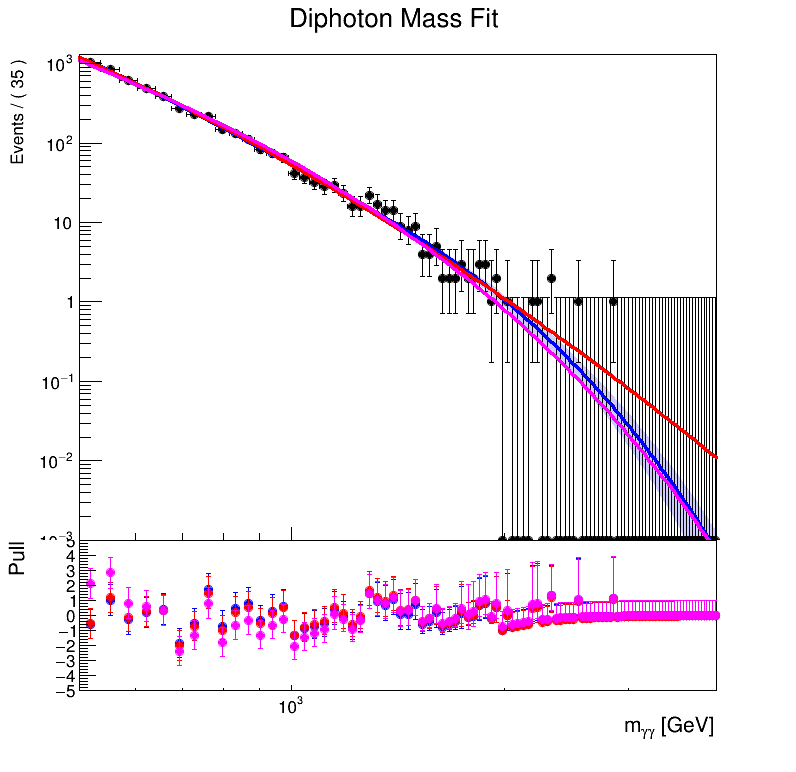

In [13]:
# Fit and plot
x = ROOT.RooRealVar("x", "Diphoton Mass [GeV]", 500, 4000)

# data = ROOT.RooDataHist("data", "data", ROOT.RooArgList(x), h)
data = ROOT.RooDataSet("data", "data", ROOT.RooArgSet(x), ROOT.RooFit.Import(t_mgg))

emm_model = bkg.ExponentialMixtureModel(x, 2)
emm_fit_result = emm_model.pdf.fitTo(data, ROOT.RooFit.Save())

dijet_model = bkg.Dijet(x)
dijet_fit_result = dijet_model.pdf.fitTo(data, ROOT.RooFit.Save())

exppow_model = bkg.ExpPow(x)
exppow_fit_result = exppow_model.pdf.fitTo(data, ROOT.RooFit.Save()) 

bkg.plot_fits(
    data, x, bins,
    [emm_model, dijet_model, exppow_model],
    ["Exponential Mixture", "Dijet", "ExpPow"],
    [emm_fit_result, None, None],
)

# Toy Studies

To study the performance of the hyperexponential model on the particular background functions used in CMS we generate a number of toys from a particular function and asses the bias and coverage as functions of $x$. The bias and coverage are measured with respect to the generating pdf.

In [ ]:
# Get and plot the AIC/BIC for the toy data
# toy_aic_bic_df = get_AIC_BIC_loo(t=toy_data, tag="toy_data")
# plot_AIC_BIC_loo(df=toy_aic_bic_df,)

[#1] INFO:NumericIntegration -- RooRealIntegral::init(exppow_pdf_Int[x]) using numeric integrator RooRombergIntegrator to calculate Int(x)
[#1] INFO:NumericIntegration -- RooRealIntegral::init(exppow_pdf_Int[x]) using numeric integrator RooRombergIntegrator to calculate Int(x)
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
[#1] INFO:Minimization --  The following expressions will be evaluated in cache-and-track mode: (exp_0,exp_1,exp_2)
Minuit2Minimizer: Minimize with max-calls 2500 convergence for edm < 1 strategy 1
Minuit2Minimizer : Valid minimum - status = 1
FVAL  = 31191.6732732421115
Edm   = 0.00108669725276500789
Nfcn  = 381
raw_rate_0	  = -0.00288928	 +/-  0.000876332	(limited)
raw_rate_1	  = -0.00181625	 +/-  0.000841786	(limited)
raw_rate_2	  = -0.00420501	 +/-  0.000888995	(limited)
weight_0	  = 0.100922	 +/-  0.155102	(limited)
weight_1	  = 0.510041	 +/-  0.172262	(limited)
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptim

Info in <Minuit2>: MnSeedGenerator Computing seed using NumericalGradient calculator
Info in <Minuit2>: MnSeedGenerator Initial state: FCN =       33131.54692 Edm =       2121.908153 NCalls =     21
Info in <Minuit2>: NegativeG2LineSearch Doing a NegativeG2LineSearch since one of the G2 component is negative
Info in <Minuit2>: MnSeedGenerator Negative G2 found - new state: 
  Minimum value : 32076.48028
  Edm           : 4317.536868
  Internal parameters:	[      1.371459022      1.371459022     0.9900794826    -0.3398369095    -0.3398369095]	
  Internal gradient  :	[      8348.932983      2387.751441      30.93254141      1281.280577      604.7660557]	
  Internal covariance matrix:
[[  0.00016686561              0              0              0              0]
 [              0  0.00041167151              0              0              0]
 [              0              0  0.00018059562              0              0]
 [              0              0              0   0.0014733219          

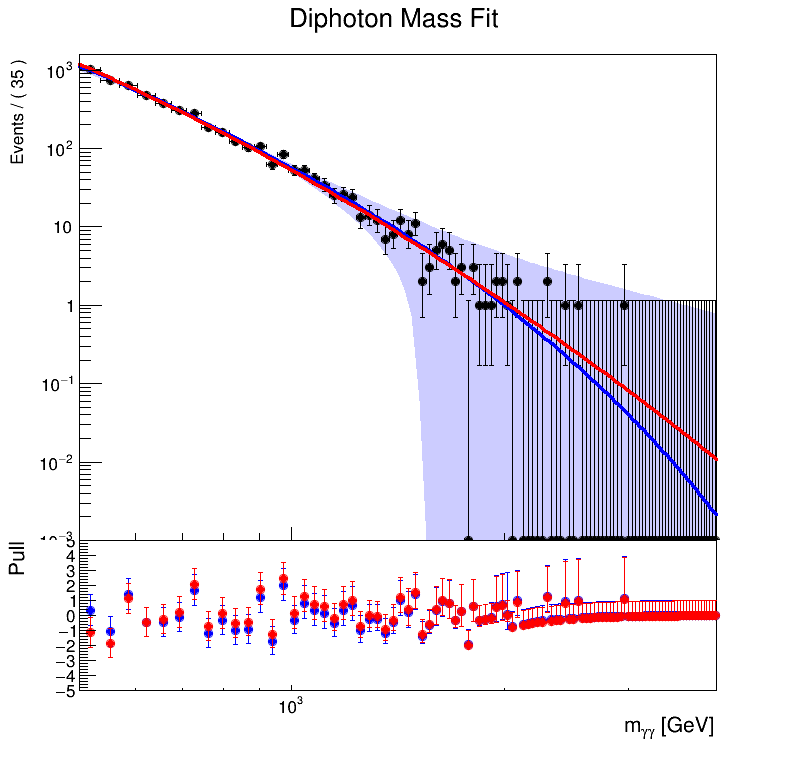

In [18]:
# Generate toy data
n_toy_events = data.numEntries()

toy_model = exppow_model
# toy_model = dijet_model

toy_pdf = toy_model.pdf

toy_data = ROOT.RooDataSet(
    "toy_data", "toy_data",
    ROOT.RooArgSet(x),
    ROOT.RooFit.Import(
        toy_pdf.generate(ROOT.RooArgSet(x), n_toy_events)
    )
)

# Fit the toy data with the Exponential Mixture Model
emm_toy = bkg.ExponentialMixtureModel(x, 3)
emm_toy_fit_result = emm_toy.pdf.fitTo(toy_data, ROOT.RooFit.Save())

# Plot the toy data and the fit
bkg.plot_fits(
    toy_data, x, bins,
    [emm_toy, dijet_model],
    ["Exponential Mixture (Toy Fit)", toy_model.name],
    [emm_toy_fit_result, None],
)

In [ ]:
# Submit jobs scanning the space of n_exp and n_events per toy
# TODO: Verify that this is correct. For some reason the shape of the bias seems too consistent across toys.
import os
from analysis.tools.storage_config import scripts_dir
from analysis.tools import condor

script = f"{scripts_dir}/bkg_study_get_bias_inputs.py"

# toy_model_name = "Dijet"
toy_model_name = "ExpPow"

n_toys = 1000
n_exps = [2,3,4,5,6]
n_events_per_toy_list = [5000, 10000, 20000, 50000]

condor_tasks = []
for n_exp in n_exps:
    for n_events_per_toy in n_events_per_toy_list:
        task = condor.Task(bkg.get_bias_inputs, (toy_model_name, n_toys, n_events_per_toy, n_exp), {})
        condor_tasks.append(task)
condor.submit_tasks("bkg_study_get_bias_inputs", condor_tasks)


0

Submitting job(s)....................
20 job(s) submitted to cluster 828216.


I'm not doing this right I think. For one the errors on the fit prediction may be asymmetric but this is not accounted for in what I'm doing here.

No bias inputs found for n_exp=4, n_events_per_toy=50000. Skipping.
No bias inputs found for n_exp=5, n_events_per_toy=50000. Skipping.
No bias inputs found for n_exp=6, n_events_per_toy=20000. Skipping.
No bias inputs found for n_exp=6, n_events_per_toy=50000. Skipping.
No data for n_exp=6 with n_events_per_toy=20000. Skipping.
No data for n_exp=4 with n_events_per_toy=50000. Skipping.
No data for n_exp=5 with n_events_per_toy=50000. Skipping.
No data for n_exp=6 with n_events_per_toy=50000. Skipping.


Text(1, 0, 'Diphoton Mass [GeV]')

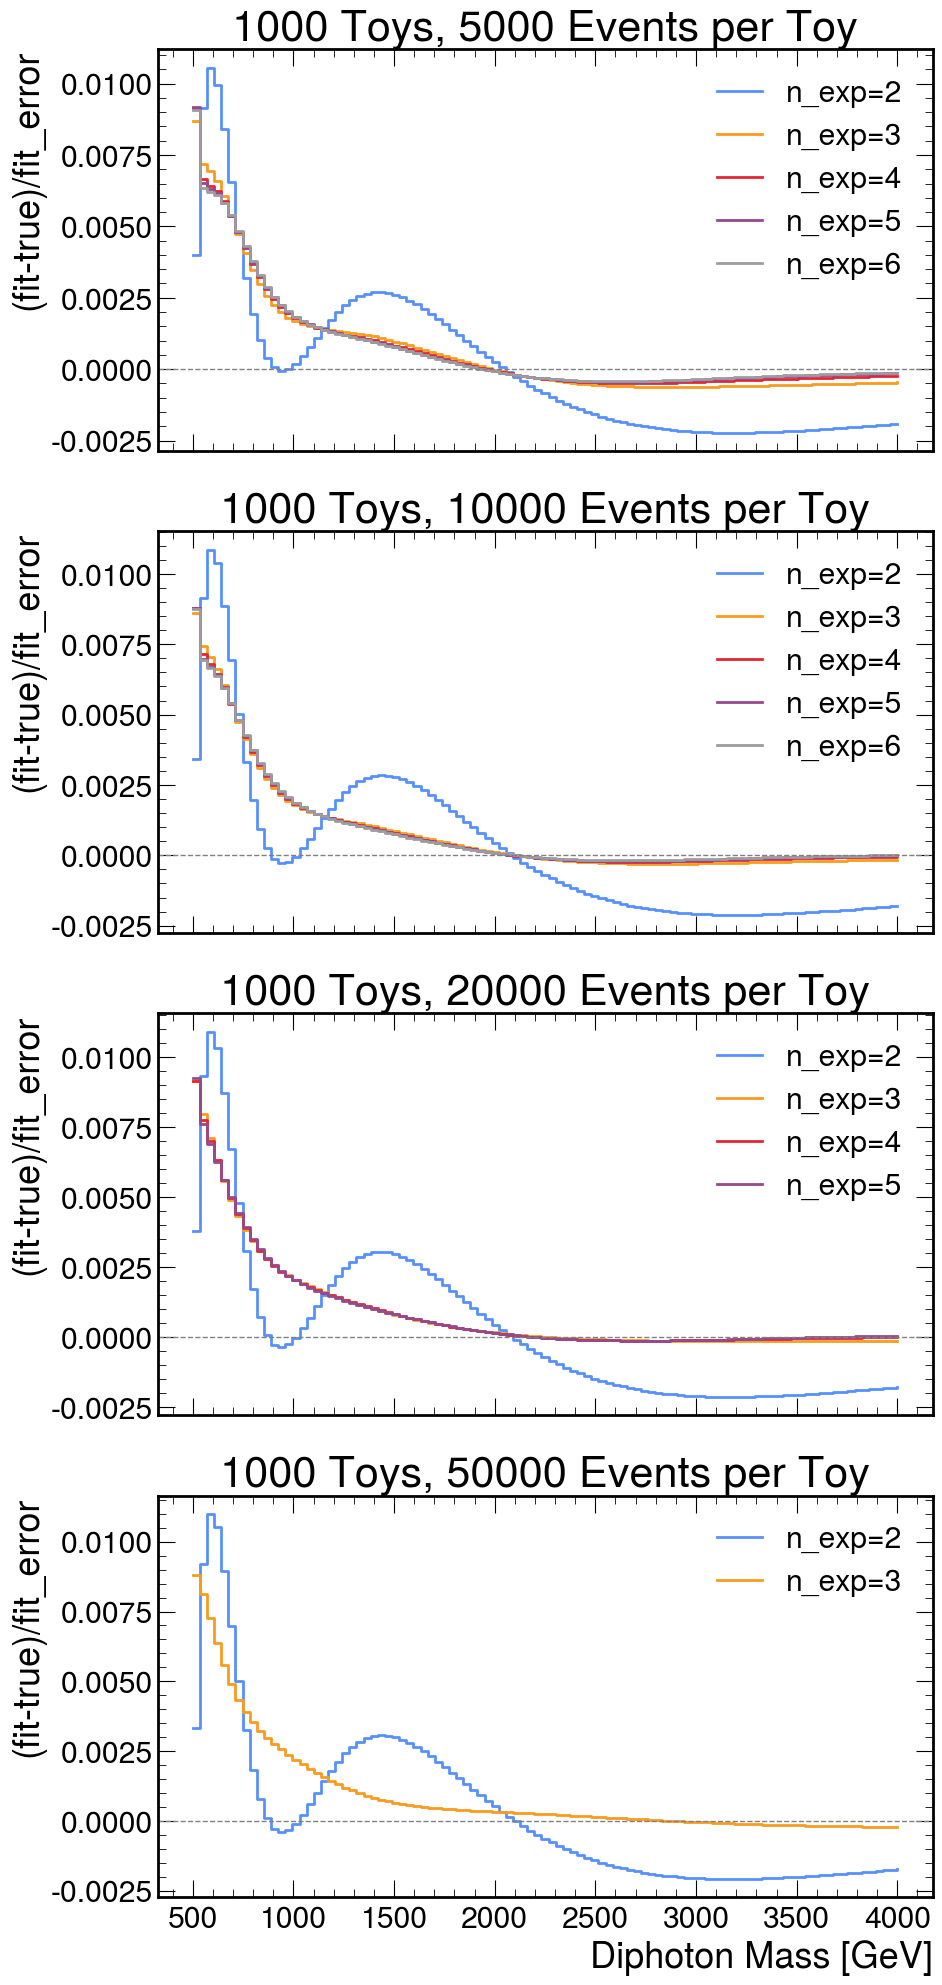

In [29]:
# Plot the bias results

df = bkg.get_bias_info(toy_model.name, n_toys, n_events_per_toy_list, n_exps)
bins = np.linspace(500, 4000, 100)

fig, axs = plt.subplots(
    len(n_events_per_toy_list), 1,
    figsize=(10, 6 * len(n_events_per_toy_list)),
    sharex=True,)

for i, n_events_per_toy in enumerate(n_events_per_toy_list):
    _df = df[df['n_events_per_toy'] == n_events_per_toy]

    for n_exp in n_exps:
        __df = _df[_df['n_exp'] == n_exp]
        if __df.empty:
            print(f"No data for n_exp={n_exp} with n_events_per_toy={n_events_per_toy}. Skipping.")
            continue
        axs[i].step(
            bins, __df['pull_mean'].values[0],
            where='post',
            label=f'n_exp={n_exp}',
            linewidth=2,
        )

    axs[i].set_ylabel("(fit-true)/fit_error")
    axs[i].set_title(f"{n_toys} Toys, {n_events_per_toy} Events per Toy")
    axs[i].legend(loc='upper right', fontsize='small')
    
    # Draw horizontal line at zero for reference
    axs[i].axhline(0, color='gray', linestyle='--', linewidth=1)

axs[-1].set_xlabel("Diphoton Mass [GeV]")

Text(1, 0, 'Diphoton Mass [GeV]')

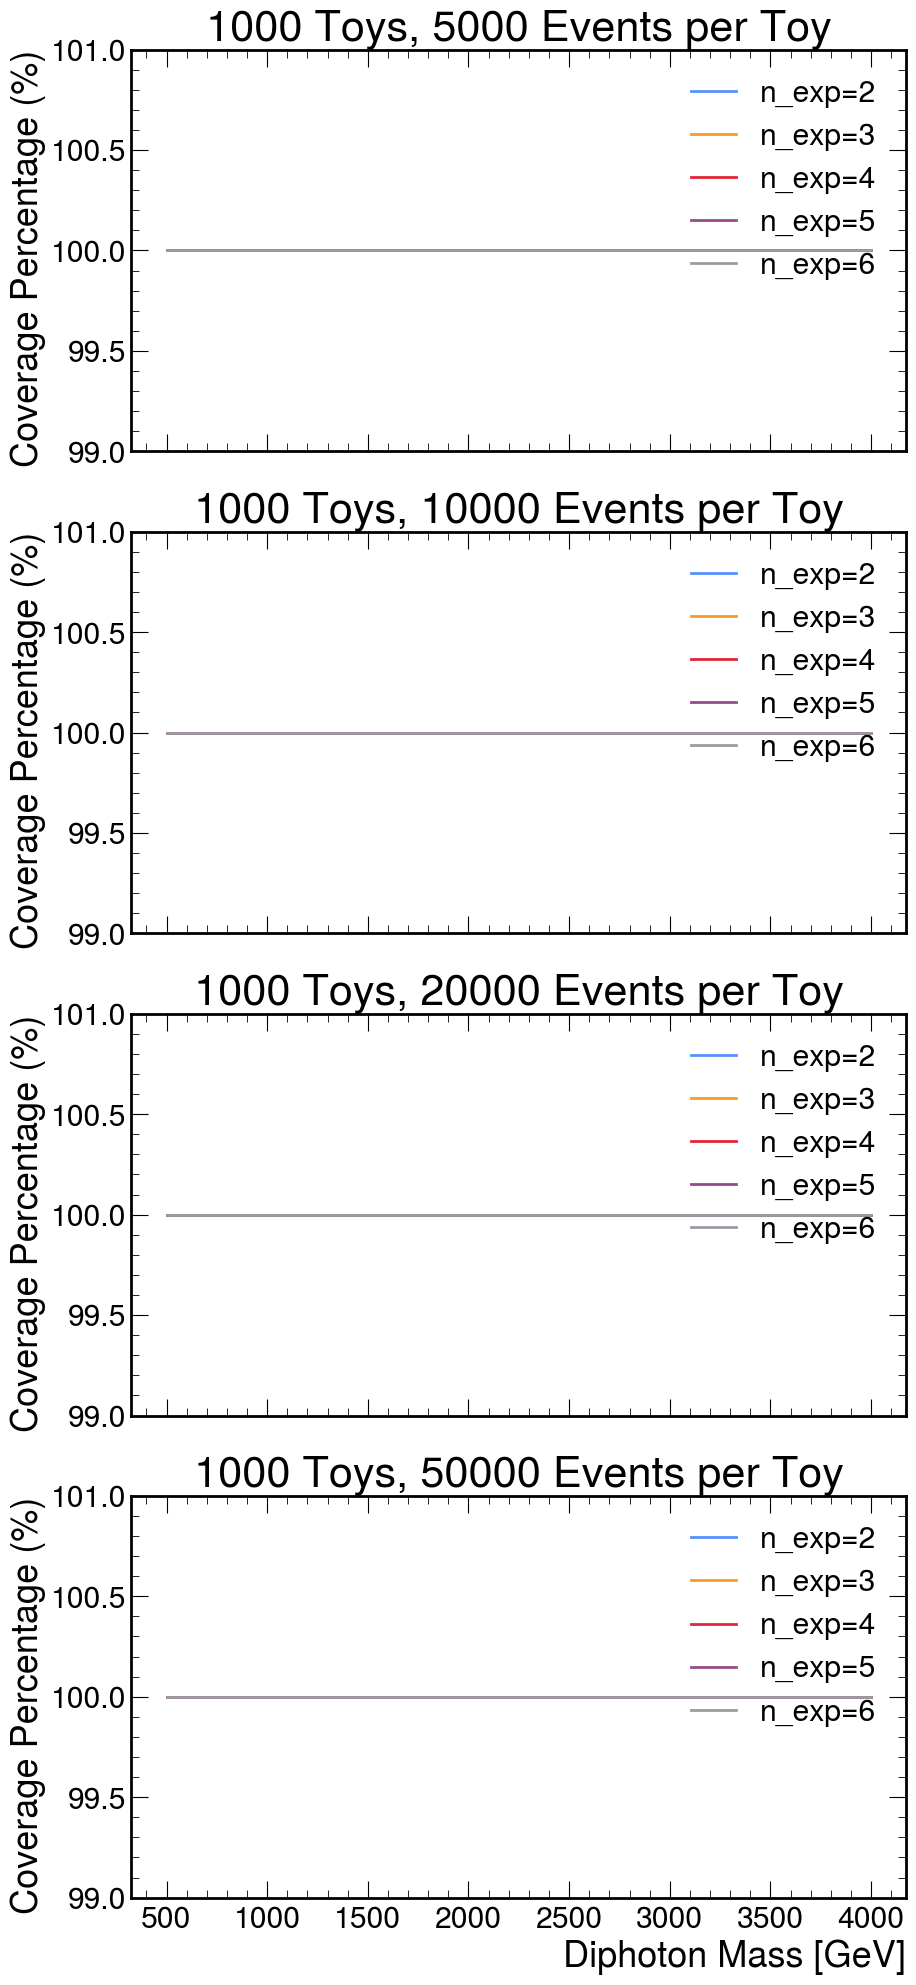

In [9]:
# Plot the coverage percentage
bins = np.linspace(500, 4000, 100)

fig, axs = plt.subplots(
    len(n_events_per_toy_list), 1,
    figsize=(10, 6 * len(n_events_per_toy_list)),
    sharex=True,)

for i, n_events_per_toy in enumerate(n_events_per_toy_list):
    _df = df[df['n_events_per_toy'] == n_events_per_toy]

    for n_exp in n_exps:
        __df = _df[_df['n_exp'] == n_exp]
        if __df.empty:
            print(f"No data for n_exp={n_exp} with n_events_per_toy={n_events_per_toy}. Skipping.")
            continue

        axs[i].step(
            bins, __df['covered_percentage'].values[0],
            where='post',
            label=f'n_exp={n_exp}',
            linewidth=2,
        )

    axs[i].set_ylabel("Coverage Percentage (%)")
    axs[i].set_title(f"{n_toys} Toys, {n_events_per_toy} Events per Toy")
    axs[i].legend(loc='upper right', fontsize='small')
    axs[i].set_ylim(99, 101)  # Set y-limits to ensure visibility of the 95% line

    # Draw horizontal line at 95% for reference
    axs[i].axhline(95, color='gray', linestyle='--', linewidth=1)
axs[-1].set_xlabel("Diphoton Mass [GeV]")

# How hard do I have to work to overfit?

Maybe it's worth it to add a section on this to prove that overfitting is not a problem.

# Bibliography

## HEP Data Entry
[Search for New Physics in High-mass diphoton events](https://www.hepdata.net/record/ins2787227)